In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from ast import literal_eval
from collections import defaultdict
%matplotlib inline
import random
from sklearn.preprocessing import MinMaxScaler

In [3]:
city_distances = pd.read_csv('D:/DST/cities.csv',sep='\t')
city = pd.read_csv('D:/DST/Seller_City.csv')
city = city.loc[:, city.columns != 'Unnamed: 0']
brand = pd.read_csv('D:/DST/New/Brand_Wise_BestSellers.csv')
brand = brand.loc[:, brand.columns != 'Unnamed: 0']
category = pd.read_csv('D:/DST/New/Category_Wise_BestSellers.csv')
category = category.loc[:, category.columns != 'Unnamed: 0']
product = pd.read_csv('D:/DST/New/Product_Wise_BestSellers.csv')
product = product.loc[:, product.columns != 'Unnamed: 0']
data = pd.read_csv('D:/DST/FinalData.csv')
data = data[['MultiLink','Product','Brand','Seller']]
map_data = data.drop_duplicates()


In [4]:
best_Sellers_PRODUCT = pd.DataFrame(product[['Product', 'Best_Seller_ALL_OVER','Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']])

product_brand_map = data[['Product','Brand']].drop_duplicates().reset_index(drop=True)
dr = pd.merge(product_brand_map,brand,on='Brand')
dr = dr.drop_duplicates()
best_Sellers_BRAND = dr[['Product', 'Best_Seller_ALL_OVER','Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']]

product_category_map = data[['Product','MultiLink']].drop_duplicates().reset_index(drop=True)
dr = pd.merge(product_category_map,category,on='MultiLink')
dr = dr.drop_duplicates()
best_Sellers_CATEGORY = dr[['Product', 'Best_Seller_ALL_OVER','Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']]

In [5]:
rr = pd.merge(best_Sellers_PRODUCT,best_Sellers_CATEGORY,on='Product')
lis = ['Best_Seller_ALL_OVER','Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']
for item in lis:
    x = item+'_x'
    y = item+'_y'
    rr[item] = (rr[x] == rr[y]).astype(int)

PRODUCT_CATEGORY = rr[['Product', 'Best_Seller_ALL_OVER','Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']]

In [6]:
rr = pd.merge(best_Sellers_BRAND,best_Sellers_CATEGORY,on='Product')
lis = ['Best_Seller_ALL_OVER','Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']
for item in lis:
    x = item+'_x'
    y = item+'_y'
    rr[item] = (rr[x] == rr[y]).astype(int)

BRAND_CATEGORY = rr[['Product', 'Best_Seller_ALL_OVER','Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']]

In [7]:
rr = pd.merge(best_Sellers_PRODUCT,best_Sellers_BRAND,on='Product')
lis = ['Best_Seller_ALL_OVER','Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']
for item in lis:
    x = item+'_x'
    y = item+'_y'
    rr[item] = (rr[x] == rr[y]).astype(int)

PRODUCT_BRAND = rr[['Product', 'Best_Seller_ALL_OVER','Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']]

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       316
           1       0.96      0.96      0.96       289

   micro avg       0.96      0.96      0.96       605
   macro avg       0.96      0.96      0.96       605
weighted avg       0.96      0.96      0.96       605

[[303  13]
 [ 12 277]]


C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


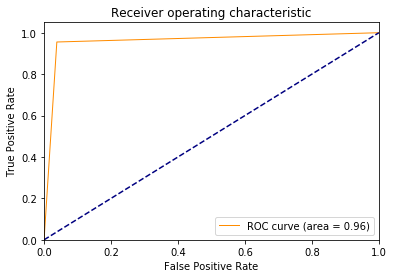

In [8]:
from sklearn.model_selection import train_test_split
X = PRODUCT_BRAND[['Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']].astype(int)
Y = PRODUCT_BRAND[['Best_Seller_ALL_OVER']].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,Y_train)
pred = lm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test,pred))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred, Y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       617
           1       0.77      0.40      0.53        25

   micro avg       0.97      0.97      0.97       642
   macro avg       0.87      0.70      0.76       642
weighted avg       0.97      0.97      0.97       642

[[614   3]
 [ 15  10]]


C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


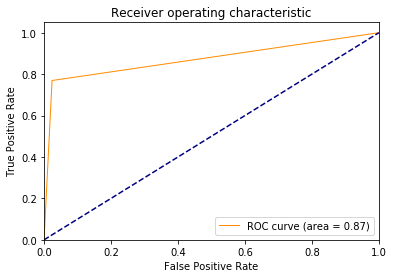

In [9]:
from sklearn.model_selection import train_test_split
X = PRODUCT_CATEGORY[['Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']].astype(int)
Y = PRODUCT_CATEGORY[['Best_Seller_ALL_OVER']].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,Y_train)
pred = lm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test,pred))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred, Y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       612
           1       0.88      0.42      0.57        33

   micro avg       0.97      0.97      0.97       645
   macro avg       0.92      0.71      0.78       645
weighted avg       0.96      0.97      0.96       645

[[610   2]
 [ 19  14]]


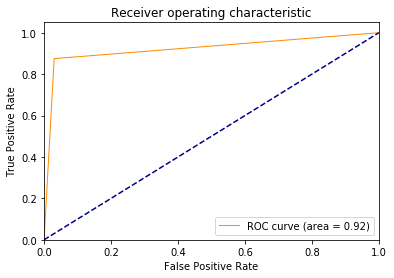

In [10]:
from sklearn.model_selection import train_test_split
X = BRAND_CATEGORY[['Best_Seller_FeedBack_Rating','Best_Seller_Product_Rating','Best_Seller_Packaging_Rating','Best_Seller_Courier_Rating']].astype(int)
Y = BRAND_CATEGORY[['Best_Seller_ALL_OVER']].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,Y_train)
pred = lm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test,pred))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred, Y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [11]:

# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(pred, Y_test)
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [14]:
data = pd.read_csv('D:/DST/FinalData.csv')

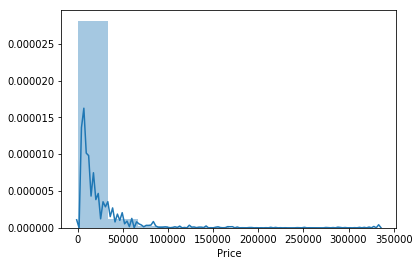

In [22]:
sns.distplot(data['Price'],bins=10)